<img src="new-york-1590175_640.jpg">

# Crimes of New York: A Comprehensive Study of Reported Crimes

1. **Introduction**
    1. Problem Statement
    1. Overview of Analysis
    1. Information about Dataset
1. **Data Preparation**
    1. Data Wrangling
    1. Data Description
    1. Feature Engineering
1. **Exploratory Data Analysis**
    1. Data Exploration
    1. Insights
1. **Model Exploration**
    1. Model Selection
    1. Preparing data for training
    1. Neural Network

## 1. Introduction

### 1.1 Problem Statement
New York City has a population of 8.5 million people. Once known as the "murder capital", NYC crime, especially murder rates, has decreased in that last two decades. However, crime has not stopped, so it's important to know when, where, and what crimes are taking place. It is especially important to know what kind of crimes happen where. Thus, we're going to embark on an exploratory data analysis of crime complaints in NYC and make predictions about crimes in Brooklyn.

### 1.2 Overview of Analysis
In this notebook, we will examine and analyze crime complaints in New York City. We will start off by data munging and feature engineering. Then perform data visualization to get a better understanding of the data. Finally, we will perform predictive modeling to make predictions about future events based on the current data. In doing so, we will answer questions such as:
1. What kinds of crimes are most prevalent in NYC? Brooklyn?
1. Where does crime take place?
1. Are there certain times when crime is more likely to occur? If so, when?
1. What are the most common crimes?
1. Can we predict where and when a crime will occur?
1. Can we predict who is mostly likely to be a victim of a crime?

### 1.3 Information about Dataset
The data set used in this notebook is from the [NYC Open Data Portal]( https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Current-YTD/5uac-w243), recording all felony, misdemeanor and violation crimes reported as of summer of 2018. Explanations of the features referenced in this notebooks can be obtained through the provided link.

## 2. Data Preparation

### 2.1 Data Wrangling

We'll start our data preparation by importing useful libraries and retrieving our data. 

In [ ]:
# Suppress possible warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#import plotly.plotly as py
#import plotly.graph_objs as go 
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [ ]:
# Libraries for data analysis and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
#import cufflinks as cf
#cf.go_offline()

In [ ]:
#init_notebook_mode(connected=True) 

#### Import dataset

In [ ]:
# Original dataset
orig = pd.read_csv('NYPD_Complaint_Data_Current_YTD.csv')

# Copy of dataset we'll modify
data = pd.read_csv('NYPD_Complaint_Data_Current_YTD.csv')

### 2.2 Data Description

We'll start examining our data by looking at the features.

In [ ]:
data.head()

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,...,SUSP_SEX,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,831526991,67,BROOKLYN,03/31/2018,23:30:00,03/31/2018,23:37:00,COMPLETED,NaN,NaN,...,NaN,NaN,UNKNOWN,UNKNOWN,E,1003227.0,177460.0,40.653751,-73.931609,"(40.653751263, -73.931609227)"
1,496736340,120,STATEN ISLAND,03/31/2018,23:20:00,03/31/2018,23:30:00,COMPLETED,RICHMOND TERRACE,10143.0,...,M,NaN,<18,BLACK,F,962748.0,174174.0,40.644726,-74.077483,"(40.644726131, -74.077483159)"
2,399593692,105,QUEENS,03/31/2018,23:15:00,03/31/2018,23:20:00,COMPLETED,NaN,NaN,...,M,NaN,18-24,BLACK,F,1056932.0,200034.0,40.715434,-73.737816,"(40.715433534, -73.737816163)"
3,282376455,110,QUEENS,03/31/2018,23:10:00,03/31/2018,23:20:00,COMPLETED,NaN,NaN,...,M,NaN,25-44,WHITE HISPANIC,M,1014990.0,210503.0,40.744414,-73.889065,"(40.744413503, -73.889065158)"
4,201598299,78,BROOKLYN,03/31/2018,23:10:00,03/31/2018,23:19:00,COMPLETED,572 WARREN STREET,2379.0,...,F,NaN,25-44,BLACK,F,989141.0,187733.0,40.681967,-73.982367,"(40.681967344, -73.982367054)"


In [ ]:
data.describe()

,CMPLNT_NUM,ADDR_PCT_CD,HOUSING_PSA,JURISDICTION_CODE,KY_CD,PD_CD,TRANSIT_DISTRICT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
count,1.095430e+05,109543.000000,8981.000000,109486.000000,109543.000000,109486.000000,3132.000000,1.095410e+05,109541.000000,109541.000000,109541.000000
mean,5.485759e+08,62.203710,6740.281817,0.991953,304.255087,412.556939,12.491699,1.004689e+06,207892.495011,40.737253,-73.926219
std,2.602368e+08,34.478829,14318.362695,8.356367,153.408398,220.627606,12.194563,2.107122e+04,30256.438911,0.083050,0.075994
min,1.000032e+08,1.000000,218.000000,0.000000,101.000000,101.000000,1.000000,9.135120e+05,121674.000000,40.500391,-74.254377
25%,3.221076e+08,34.000000,477.000000,0.000000,121.000000,254.000000,3.000000,9.916000e+05,184994.000000,40.674369,-73.973456
50%,5.482238e+08,62.000000,696.000000,0.000000,341.000000,349.000000,4.000000,1.004277e+06,207297.000000,40.735664,-73.927708
75%,7.740450e+08,90.000000,1233.000000,0.000000,351.000000,638.000000,23.000000,1.016293e+06,235507.000000,40.813058,-73.884233
max,9.999894e+08,123.000000,66871.000000,97.000000,678.000000,922.000000,34.000000,1.067226e+06,271820.000000,40.912723,-73.700568


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109543 entries, 0 to 109542
Data columns (total 35 columns):
CMPLNT_NUM           109543 non-null int64
ADDR_PCT_CD          109543 non-null int64
BORO_NM              109485 non-null object
CMPLNT_FR_DT         109543 non-null object
CMPLNT_FR_TM         109543 non-null object
CMPLNT_TO_DT         93527 non-null object
CMPLNT_TO_TM         93577 non-null object
CRM_ATPT_CPTD_CD     109543 non-null object
HADEVELOPT           5822 non-null object
HOUSING_PSA          8981 non-null float64
JURISDICTION_CODE    109486 non-null float64
JURIS_DESC           109543 non-null object
KY_CD                109543 non-null int64
LAW_CAT_CD           109543 non-null object
LOC_OF_OCCUR_DESC    90151 non-null object
OFNS_DESC            109539 non-null object
PARKS_NM             461 non-null object
PATROL_BORO          109486 non-null object
PD_CD                109486 non-null float64
PD_DESC              109486 non-null object
PREM_TYP_DESC      

From the data description, there are 109543 instances with 35 features. Eight features 
are floating point numbers, three are integers, and 24 are objects. Given that the 
specific machine learning algorithms we'll be using would work best with numeric values, 
we'll start the data munging process by removing some features, converting object-types 
to numeric types, handling missing values, and adding a few features.

### 2.3 Feature Engineering

We'll start by getting a glimpse of all the columns in our dataframe.

In [ ]:
data.columns

Index(['CMPLNT_NUM', 'ADDR_PCT_CD', 'BORO_NM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM',
       'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'CRM_ATPT_CPTD_CD', 'HADEVELOPT',
       'HOUSING_PSA', 'JURISDICTION_CODE', 'JURIS_DESC', 'KY_CD', 'LAW_CAT_CD',
       'LOC_OF_OCCUR_DESC', 'OFNS_DESC', 'PARKS_NM', 'PATROL_BORO', 'PD_CD',
       'PD_DESC', 'PREM_TYP_DESC', 'RPT_DT', 'STATION_NAME', 'SUSP_AGE_GROUP',
       'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT', 'VIC_AGE_GROUP',
       'VIC_RACE', 'VIC_SEX', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude',
       'Longitude', 'Lat_Lon'],
      dtype='object')

By referencing the linked data portal, we'll know what each column means. Thus, we have an idea as to which columns would be useful and which ones won't. For this analysis, the following features will be discarded because there are either not enough data points or are redundant for our specific purposes (they will remain in the original dataframe "orig"):
1. Complaint Number (CMPLNT_NUM)
1. Housing Development (HADEVELOPT)
1. Housing PSA (HOUSING_PSA)
1. Jurisdiction Code (JURISDICTION_CODE)
1. Jurisdiction Description (JURISDICTION_DESC)
1. Location of Occurence Description (LOC_OF_OCCUR_DESC)
1. Parks (PARKS_NM)
1. Patrol Borough (PATROL_BORO)
1. Station Name (STATION_NAME)
1. Transit District (TRANSIT_DISTRICT)
1. X-Coordinate (X_COORD_CD)
1. Y-Coordinate (Y_COORD_CD)
1. Latitude-Longitude (Lat_Lon)

In [ ]:
crime = data[['ADDR_PCT_CD', 'BORO_NM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM',
       'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'CRM_ATPT_CPTD_CD', 'KY_CD', 'LAW_CAT_CD',
       'OFNS_DESC','PD_DESC', 'PREM_TYP_DESC', 'RPT_DT', 'SUSP_AGE_GROUP',
       'SUSP_RACE', 'SUSP_SEX', 'VIC_AGE_GROUP',
       'VIC_RACE', 'VIC_SEX', 'Latitude',
       'Longitude']]

In [ ]:
len(crime.columns)

21

In [ ]:
crime.head()

,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,KY_CD,LAW_CAT_CD,OFNS_DESC,...,PREM_TYP_DESC,RPT_DT,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,Latitude,Longitude
0,67,BROOKLYN,03/31/2018,23:30:00,03/31/2018,23:37:00,COMPLETED,236,MISDEMEANOR,DANGEROUS WEAPONS,...,STREET,03/31/2018,NaN,NaN,NaN,UNKNOWN,UNKNOWN,E,40.653751,-73.931609
1,120,STATEN ISLAND,03/31/2018,23:20:00,03/31/2018,23:30:00,COMPLETED,104,FELONY,RAPE,...,RESIDENCE - PUBLIC HOUSING,03/31/2018,18-24,UNKNOWN,M,<18,BLACK,F,40.644726,-74.077483
2,105,QUEENS,03/31/2018,23:15:00,03/31/2018,23:20:00,COMPLETED,361,MISDEMEANOR,OFF. AGNST PUB ORD SENSBLTY &,...,RESIDENCE-HOUSE,03/31/2018,25-44,BLACK,M,18-24,BLACK,F,40.715434,-73.737816
3,110,QUEENS,03/31/2018,23:10:00,03/31/2018,23:20:00,COMPLETED,105,FELONY,ROBBERY,...,RESIDENCE - APT. HOUSE,03/31/2018,UNKNOWN,WHITE HISPANIC,M,25-44,WHITE HISPANIC,M,40.744414,-73.889065
4,78,BROOKLYN,03/31/2018,23:10:00,03/31/2018,23:19:00,COMPLETED,578,VIOLATION,HARRASSMENT 2,...,RESIDENCE - PUBLIC HOUSING,03/31/2018,45-64,WHITE HISPANIC,F,25-44,BLACK,F,40.681967,-73.982367


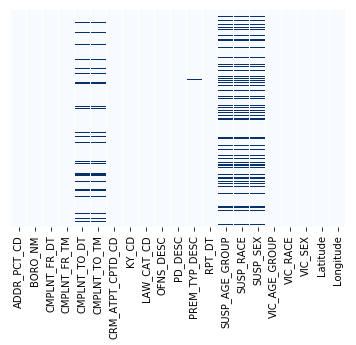

In [ ]:
sns.heatmap(crime.isnull(),yticklabels=False,cbar=False,cmap='Blues')

Currently, we have missing data for demographic information for the suspects and complaint times/dates, in addition to the type of area where the crime occurred. Since we will not be using suspect demographic information, those features will be removed. We will also remove the missing complaint data and time information as well as the one premies description feature.

In [ ]:
crime['SUSP_AGE_GROUP'].isnull().count()

109543

In [ ]:
# Too little information about suspect demographics, so features will be removed
crime = crime.drop('SUSP_AGE_GROUP',axis=1)  
crime = crime.drop('SUSP_RACE',axis=1)
crime = crime.drop('SUSP_SEX',axis=1)

In [ ]:
crime = crime.drop('CMPLNT_TO_DT',axis=1)
crime = crime.drop('CMPLNT_TO_TM',axis=1)

In [ ]:
crime.head()

,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CRM_ATPT_CPTD_CD,KY_CD,LAW_CAT_CD,OFNS_DESC,PD_DESC,PREM_TYP_DESC,RPT_DT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,Latitude,Longitude
0,67,BROOKLYN,03/31/2018,23:30:00,COMPLETED,236,MISDEMEANOR,DANGEROUS WEAPONS,"WEAPONS, POSSESSION, ETC",STREET,03/31/2018,UNKNOWN,UNKNOWN,E,40.653751,-73.931609
1,120,STATEN ISLAND,03/31/2018,23:20:00,COMPLETED,104,FELONY,RAPE,RAPE 2,RESIDENCE - PUBLIC HOUSING,03/31/2018,<18,BLACK,F,40.644726,-74.077483
2,105,QUEENS,03/31/2018,23:15:00,COMPLETED,361,MISDEMEANOR,OFF. AGNST PUB ORD SENSBLTY &,AGGRAVATED HARASSMENT 2,RESIDENCE-HOUSE,03/31/2018,18-24,BLACK,F,40.715434,-73.737816
3,110,QUEENS,03/31/2018,23:10:00,COMPLETED,105,FELONY,ROBBERY,"ROBBERY,DELIVERY PERSON",RESIDENCE - APT. HOUSE,03/31/2018,25-44,WHITE HISPANIC,M,40.744414,-73.889065
4,78,BROOKLYN,03/31/2018,23:10:00,COMPLETED,578,VIOLATION,HARRASSMENT 2,"HARASSMENT,SUBD 3,4,5",RESIDENCE - PUBLIC HOUSING,03/31/2018,25-44,BLACK,F,40.681967,-73.982367


In [ ]:
crime = crime.drop('PREM_TYP_DESC',axis=1)

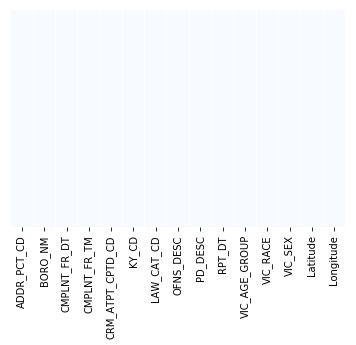

In [ ]:
sns.heatmap(crime.isnull(),yticklabels=False,cbar=False,cmap='Blues')

In [ ]:
crime = crime[crime['CMPLNT_FR_DT'].apply(lambda year: (year[6:] == '2017') or (year[6:] == '2016'))]

In [ ]:
# Impute SEX, RACE, AGE
#from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Impute Age Group
crime['VIC_AGE_GROUP'].value_counts()

25-44      2002
UNKNOWN    1449
45-64      1362
65+         551
18-24       423
<18         344
-942          1
972           1
Name: VIC_AGE_GROUP, dtype: int64

In [ ]:
crime[crime['VIC_AGE_GROUP'] == '972'] = "UNKNOWN"

In [ ]:
crime[crime['VIC_AGE_GROUP'] == '-942'] = "UNKNOWN"

In [ ]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6133 entries, 1181 to 109537
Data columns (total 15 columns):
ADDR_PCT_CD         6133 non-null object
BORO_NM             6129 non-null object
CMPLNT_FR_DT        6133 non-null object
CMPLNT_FR_TM        6133 non-null object
CRM_ATPT_CPTD_CD    6133 non-null object
KY_CD               6133 non-null object
LAW_CAT_CD          6133 non-null object
OFNS_DESC           6131 non-null object
PD_DESC             6129 non-null object
RPT_DT              6133 non-null object
VIC_AGE_GROUP       6133 non-null object
VIC_RACE            6133 non-null object
VIC_SEX             6133 non-null object
Latitude            6133 non-null object
Longitude           6133 non-null object
dtypes: object(15)
memory usage: 766.6+ KB


In [ ]:
crime[crime['BORO_NM'].isnull()]

,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CRM_ATPT_CPTD_CD,KY_CD,LAW_CAT_CD,OFNS_DESC,PD_DESC,RPT_DT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,Latitude,Longitude
37466,42,NaN,08/07/2016,02:20:00,COMPLETED,101,FELONY,MURDER & NON-NEGL. MANSLAUGHTER,NaN,03/01/2018,18-24,BLACK,F,40.8285,-73.9055
47497,40,NaN,07/18/2017,20:30:00,COMPLETED,101,FELONY,MURDER & NON-NEGL. MANSLAUGHTER,NaN,02/21/2018,18-24,BLACK,M,40.8046,-73.9202
74898,107,NaN,09/28/2017,18:26:00,COMPLETED,101,FELONY,MURDER & NON-NEGL. MANSLAUGHTER,NaN,01/30/2018,65+,ASIAN/PAC.ISL,M,40.7291,-73.811
81400,120,NaN,07/10/2016,12:00:00,COMPLETED,101,FELONY,MURDER & NON-NEGL. MANSLAUGHTER,NaN,01/25/2018,25-44,BLACK,M,40.6256,-74.075


In [ ]:
# BRonx, bronx, queens, s.i
crime.loc[37466]['BORO_NM'] = 'BRONX'
crime.loc[37466]['PD_DESC'] = 'Unknown'

crime.loc[47497]['BORO_NM'] = 'BRONX'
crime.loc[47497]['PD_DESC'] = 'Unknown'

crime.loc[74898]['BORO_NM'] = 'QUEENS'
crime.loc[74898]['PD_DESC'] = 'Unknown'

crime.loc[81400]['BORO_NM'] = 'STATEN ISLAND'
crime.loc[81400]['PD_DESC'] = 'Unknown'


In [ ]:
crime[crime['OFNS_DESC'].isnull()] 

,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CRM_ATPT_CPTD_CD,KY_CD,LAW_CAT_CD,OFNS_DESC,PD_DESC,RPT_DT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,Latitude,Longitude
53553,122,STATEN ISLAND,09/07/2017,14:25:00,COMPLETED,126,FELONY,NaN,OBSCENITY 1,02/16/2018,UNKNOWN,UNKNOWN,E,40.5836,-74.0881
67531,72,BROOKLYN,10/13/2017,09:33:00,COMPLETED,126,FELONY,NaN,OBSCENITY 1,02/05/2018,UNKNOWN,UNKNOWN,E,40.6418,-74.0102


In [ ]:
crime.loc[53553]['OFNS_DESC'] = 'SEX CRIMES'
crime.loc[67531]['OFNS_DESC'] = 'SEX CRIMES'

## Exploratory Data Analysis

In [ ]:
crime.head()

,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CRM_ATPT_CPTD_CD,KY_CD,LAW_CAT_CD,OFNS_DESC,PD_DESC,RPT_DT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,Latitude,Longitude
1181,49,BRONX,12/08/2017,17:00:00,COMPLETED,104,FELONY,RAPE,RAPE 1,03/31/2018,18-24,BLACK,F,40.8562,-73.8444
1182,115,QUEENS,12/01/2017,00:00:00,COMPLETED,578,VIOLATION,HARRASSMENT 2,"HARASSMENT,SUBD 3,4,5",03/31/2018,45-64,WHITE HISPANIC,M,40.7509,-73.8836
1183,68,BROOKLYN,11/27/2017,09:00:00,COMPLETED,341,MISDEMEANOR,PETIT LARCENY,"LARCENY,PETIT FROM BUILDING,UN",03/31/2018,65+,WHITE,F,40.6231,-74.0327
1184,114,QUEENS,11/04/2017,10:30:00,COMPLETED,344,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,"MENACING,UNCLASSIFIED",03/31/2018,25-44,UNKNOWN,M,40.7563,-73.9223
1185,47,BRONX,11/01/2017,09:00:00,COMPLETED,578,VIOLATION,HARRASSMENT 2,"HARASSMENT,SUBD 3,4,5",03/31/2018,45-64,WHITE HISPANIC,F,40.8962,-73.8548


In [ ]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6133 entries, 1181 to 109537
Data columns (total 15 columns):
ADDR_PCT_CD         6133 non-null object
BORO_NM             6133 non-null object
CMPLNT_FR_DT        6133 non-null object
CMPLNT_FR_TM        6133 non-null object
CRM_ATPT_CPTD_CD    6133 non-null object
KY_CD               6133 non-null object
LAW_CAT_CD          6133 non-null object
OFNS_DESC           6133 non-null object
PD_DESC             6133 non-null object
RPT_DT              6133 non-null object
VIC_AGE_GROUP       6133 non-null object
VIC_RACE            6133 non-null object
VIC_SEX             6133 non-null object
Latitude            6133 non-null object
Longitude           6133 non-null object
dtypes: object(15)
memory usage: 926.6+ KB


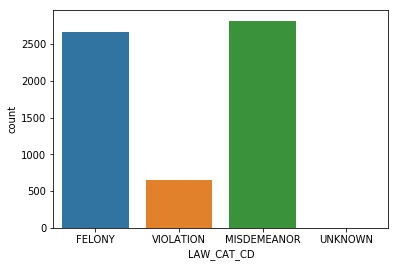

In [ ]:
sns.countplot('LAW_CAT_CD', data=crime)

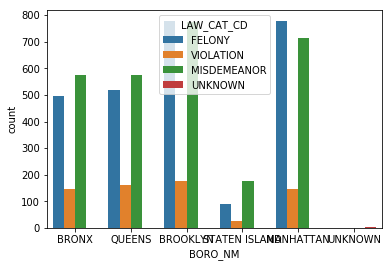

In [ ]:
sns.countplot(x=crime['BORO_NM'],data=crime, hue=crime['LAW_CAT_CD'])

In [ ]:
crime['LAW_CAT_CD'].value_counts()

MISDEMEANOR    2816
FELONY         2661
VIOLATION       654
UNKNOWN           2
Name: LAW_CAT_CD, dtype: int64

In [ ]:
crime['OFNS_DESC'].value_counts().head(5)

GRAND LARCENY                     1399
PETIT LARCENY                     1191
HARRASSMENT 2                      649
CRIMINAL MISCHIEF & RELATED OF     574
OFF. AGNST PUB ORD SENSBLTY &      452
Name: OFNS_DESC, dtype: int64

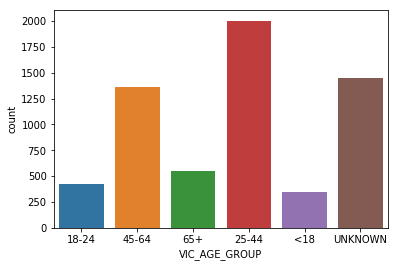

In [ ]:
sns.countplot(x='VIC_AGE_GROUP', data=crime)

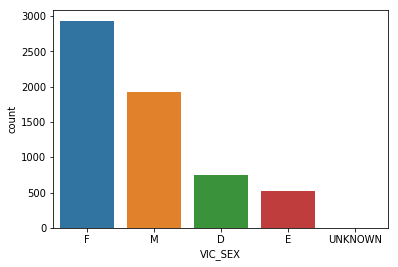

In [ ]:
sns.countplot(x='VIC_SEX', data=crime)

## Model Exploration

### 4.1 Model Selection

For our models, we will use a neural network predict whether a crime reported took place in Brooklyn.

### 4.2 Model Preparation

In [ ]:
crime['BORO_NM'] = crime.BORO_NM.astype('category')
crime['VIC_SEX'] = crime.VIC_SEX.astype('category')
crime['VIC_AGE_GROUP'] = crime.VIC_AGE_GROUP.astype('category')
crime['VIC_RACE'] = crime.VIC_RACE.astype('category')
crime['LAW_CAT_CD'] = crime.LAW_CAT_CD.astype('category')

crime.dtypes

ADDR_PCT_CD           object
BORO_NM             category
CMPLNT_FR_DT          object
CMPLNT_FR_TM          object
CRM_ATPT_CPTD_CD      object
KY_CD                 object
LAW_CAT_CD          category
OFNS_DESC             object
PD_DESC               object
RPT_DT                object
VIC_AGE_GROUP       category
VIC_RACE            category
VIC_SEX             category
Latitude              object
Longitude             object
dtype: object

In [ ]:
crime['BORO_NM_CAT'] = crime['BORO_NM'].cat.codes
crime['SEX'] = crime['VIC_SEX'].cat.codes
crime['AGE'] = crime['VIC_AGE_GROUP'].cat.codes
crime['RACE'] = crime['VIC_RACE'].cat.codes
crime['CRIME_TYPE'] = crime['LAW_CAT_CD'].cat.codes


,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CRM_ATPT_CPTD_CD,KY_CD,LAW_CAT_CD,OFNS_DESC,PD_DESC,RPT_DT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,Latitude,Longitude,BORO_NM_CAT,SEX,AGE,RACE,CRIME_TYPE
1181,49,BRONX,12/08/2017,17:00:00,COMPLETED,104,FELONY,RAPE,RAPE 1,03/31/2018,18-24,BLACK,F,40.8562,-73.8444,0,2,0,2,0
1182,115,QUEENS,12/01/2017,00:00:00,COMPLETED,578,VIOLATION,HARRASSMENT 2,"HARASSMENT,SUBD 3,4,5",03/31/2018,45-64,WHITE HISPANIC,M,40.7509,-73.8836,3,3,2,6,3
1183,68,BROOKLYN,11/27/2017,09:00:00,COMPLETED,341,MISDEMEANOR,PETIT LARCENY,"LARCENY,PETIT FROM BUILDING,UN",03/31/2018,65+,WHITE,F,40.6231,-74.0327,1,2,3,5,1
1184,114,QUEENS,11/04/2017,10:30:00,COMPLETED,344,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,"MENACING,UNCLASSIFIED",03/31/2018,25-44,UNKNOWN,M,40.7563,-73.9223,3,3,1,4,1
1185,47,BRONX,11/01/2017,09:00:00,COMPLETED,578,VIOLATION,HARRASSMENT 2,"HARASSMENT,SUBD 3,4,5",03/31/2018,45-64,WHITE HISPANIC,F,40.8962,-73.8548,0,2,2,6,3


In [ ]:
#If borough is Brooklyn -> 1, otherwise 0
def define_boro(b):
    if b == 1:
        return 1
    else:
        return 0

In [ ]:
crime['BORO_NM_CAT'] = crime['BORO_NM_CAT'].apply(define_boro)

### 4.3 Training with a Neural Network

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
features = crime[['SEX', 'AGE', 'RACE', 'CRIME_TYPE']]
target = crime['BORO_NM_CAT']

X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    test_size=0.2,
                                                    random_state=42)

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(512, activation=tf.nn.relu6),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(100, activation=tf.nn.relu),
  tf.keras.layers.Dense(50, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train.values, y_train.values, epochs=5)
model.evaluate(X_test, y_test)

Epoch 1/5
4906/4906 [==============================] - 1s 252us/step - loss: 0.7470 - acc: 0.6949
Epoch 2/5
4906/4906 [==============================] - 0s 59us/step - loss: 0.6142 - acc: 0.7071
Epoch 3/5
4906/4906 [==============================] - 0s 58us/step - loss: 0.6048 - acc: 0.7132
Epoch 4/5
4906/4906 [==============================] - 0s 56us/step - loss: 0.5946 - acc: 0.7142
Epoch 5/5
1227/1227 [==============================] - 0s 270us/step


[0.5763245938071023, 0.7245313772945358]

One-hot encoding the Borough feature increased the accuracy by 40%, but there seems to be a point where adding layers does nothing to improve the accuracy. Thus, it would be pertinent to further clean the data and utilize other features for this classification problem. 

Overall, this dataset may not be the best for classification problems because a lot of features must be label-encoded or one-hot encoded; for datasets with features that have binary values or a few different values (like the five borough), this isn't much of a problem. However, for features such as the law category, there are numerous values that the neural network could miscontrue as having some deeper numerical meaning beyond just being label encoding.